# Goals
- Use of pretrained Word2Vec models
- Visualize clusters (male vs female concepts)
- Introduce a simple fairness / bias hypothesis
- Compare with pretrained GloVe
- Sentence similarity using cosine similarity
- Apply everything on SST-2 (HuggingFace)


In [ ]:
!pip install -q datasets gensim scikit-learn matplotlib umap-learn

## Pretrained model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
#replace with the path where you have downloaded your model.
pretrained_model_path = '/content/drive/MyDrive/Tutorial_NLP/GoogleNews-vectors-negative300.bin.gz'

In [ ]:
#initialise the pre trained model using load_word2vec_format from gensim module.
model_s = KeyedVectors.load_word2vec_format(pretrained_model_path, binary=True)

In [ ]:
#vocab
print("number of words in the vocabulary:", len(model_s))

model_s["word"].shape          # vector
# model_s.get_vector("word")
# len(model_s)             # vocab size
# model_s.index_to_key     # all words

number of words in the vocabulary: 3000000


(300,)

## Some Output analysis

In [ ]:
print(model_s["queen"])

[ 0.00524902 -0.14355469 -0.06933594  0.12353516  0.13183594 -0.08886719
 -0.07128906 -0.21679688 -0.19726562  0.05566406 -0.07568359 -0.38085938
  0.10400391 -0.00081635  0.1328125   0.11279297  0.07275391 -0.046875
  0.06591797  0.09423828  0.19042969  0.13671875 -0.23632812 -0.11865234
  0.06542969 -0.05322266 -0.30859375  0.09179688  0.18847656 -0.16699219
 -0.15625    -0.13085938 -0.08251953  0.21289062 -0.35546875 -0.13183594
  0.09619141  0.26367188 -0.09472656  0.18359375  0.10693359 -0.41601562
  0.26953125 -0.02770996  0.17578125 -0.11279297 -0.00411987  0.14550781
  0.15625     0.26757812 -0.01794434  0.09863281  0.05297852 -0.03125
 -0.16308594 -0.05810547 -0.34375    -0.17285156  0.11425781 -0.09033203
  0.13476562  0.27929688 -0.04980469  0.12988281  0.17578125 -0.22167969
 -0.01190186  0.140625   -0.18164062  0.11865234  0.16113281  0.21484375
 -0.21191406  0.12695312 -0.10009766  0.13671875  0.12695312  0.01531982
  0.10449219 -0.02783203 -0.06030273  0.0222168   0.1816

In [ ]:
model_s.most_similar("king")

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [ ]:
model_s.most_similar("queen")

[('queens', 0.739944338798523),
 ('princess', 0.7070532441139221),
 ('king', 0.6510956883430481),
 ('monarch', 0.6383602023124695),
 ('very_pampered_McElhatton', 0.6357026696205139),
 ('Queen', 0.6163407564163208),
 ('NYC_anglophiles_aflutter', 0.6060680150985718),
 ('Queen_Consort', 0.5923796892166138),
 ('princesses', 0.5908074975013733),
 ('royal', 0.5637185573577881)]

In [ ]:
model_s.similarity('man', 'king')

np.float32(0.22942673)

### try some simple analogy check

In [ ]:
model_s.most_similar(positive=["king","woman"], negative=["man"])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

### Gender / role clustering using Word2Vec

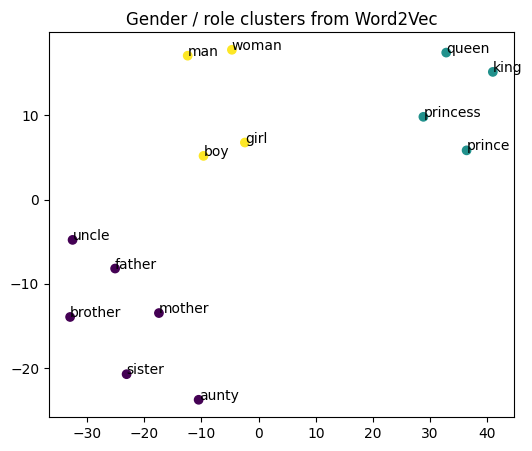

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

words = ["king","queen","man","woman","boy","girl","father","mother","prince","princess","brother","sister","uncle","aunty"]

X = np.array([model_s[w] for w in words])

kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
labels = kmeans.fit_predict(X)

tsne = TSNE(n_components=2, random_state=0, perplexity=5)
X2 = tsne.fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(X2[:,0], X2[:,1], c=labels)
for i,w in enumerate(words):
    plt.text(X2[i,0], X2[i,1], w)
plt.title("Gender / role clusters from Word2Vec")
plt.show()


# # ---- 3D t-SNE ----
# tsne = TSNE(n_components=3, random_state=0, perplexity=5)
# X3 = tsne.fit_transform(X)

# fig = plt.figure(figsize=(7,6))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=labels)

# for i, w in enumerate(words):
#     ax.text(X3[i,0], X3[i,1], X3[i,2], w)

# ax.set_title("3D Gender / role clusters from Word2Vec (t-SNE)")
# ax.set_xlabel("Dim 1")
# ax.set_ylabel("Dim 2")
# ax.set_zlabel("Dim 3")

# plt.show()

### Fairness / bias hypothesis
Because embeddings are learned from co-occurrence statistics, they may encode social or gender stereotypes.

We observe a separation between societal roles, gender and relationships.

## Load pretrained GloVe embeddings

In [ ]:
import gensim.downloader as api
glove = api.load("glove-wiki-gigaword-100")
glove.most_similar("king")

[==================================================] 100.0% 128.1/128.1MB downloaded


[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

In [ ]:
glove.most_similar(positive=["king","woman"], negative=["man"])

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

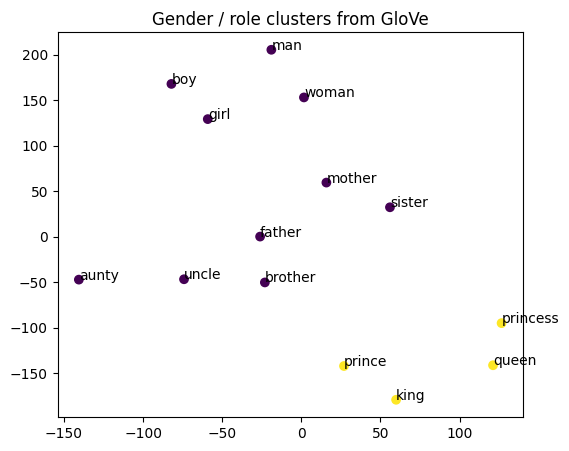

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

words = ["king","queen","man","woman","boy","girl","father","mother","prince","princess","brother","sister","uncle","aunty"]

# keep only words that exist in GloVe
words_glove = [w for w in words if w in glove]

X = np.array([glove[w] for w in words_glove])

kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
labels = kmeans.fit_predict(X)

tsne = TSNE(n_components=2, random_state=0, perplexity=5)
X2 = tsne.fit_transform(X)

plt.figure(figsize=(6,5))
plt.scatter(X2[:,0], X2[:,1], c=labels)

for i, w in enumerate(words_glove):
    plt.text(X2[i,0], X2[i,1], w)

plt.title("Gender / role clusters from GloVe")
plt.show()


## Which one is better – Word2Vec or GloVe?

There is no universally better embedding.

The real question is: better for which task and which domain?

In practice:
- domain-specific tasks often benefit from domain embeddings or fine-tuning
- general language tasks usually benefit from large pretrained embeddings


### Sentence similarity using cosine similarity (Word2Vec)

In [ ]:
import numpy as np
import re
from sklearn.metrics.pairwise import cosine_similarity

def preprocess_text(text):
    text = text.lower()
    tokens = re.findall(r"[a-z]+", text)
    return tokens

def sent_emb(sentence, model):
    tokens = preprocess_text(sentence)

    vecs = []
    for w in tokens:
        if w in model:
            vecs.append(model[w])

    if len(vecs) == 0:
        return np.zeros(model.vector_size)

    return np.mean(vecs, axis=0)


s1 = "the king and the queen rule the country"
s2 = "a man and a woman lead the nation"
s3 = "the boy plays football"

v1 = sent_emb(s1, model_s)
v2 = sent_emb(s2, model_s)
v3 = sent_emb(s3, model_s)

print("s1 vs s2:", cosine_similarity([v1], [v2])[0][0])
print("s1 vs s3:", cosine_similarity([v1], [v3])[0][0])


s1 vs s2: 0.48467317
s1 vs s3: 0.3678624


## Sentence transformers embedding
- With SBERT, the model is trained to place similar sentences close together.
- Word2Vec / GloVe were never trained for sentence similarity.

In [ ]:
!pip install -q sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

In [ ]:
ids = list(range(1, 9))

sentences = [
    # positive
    "I absolutely loved this movie",
    "The film was fantastic and enjoyable",
    "This was a wonderful and touching story",
    "The acting was brilliant and impressive",

    # negative
    "I hated this movie",
    "The film was terrible and boring",
    "This was a horrible and disappointing story",
    "The acting was bad and annoying"
]

# 1 = positive, 0 = negative
labels = np.array([1,1,1,1, 0,0,0,0])


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

X = model.encode(sentences)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

X2 = TSNE(
    n_components=2,
    random_state=0,
    perplexity=3,   # IMPORTANT: small dataset → small perplexity
    init="random"
).fit_transform(X)

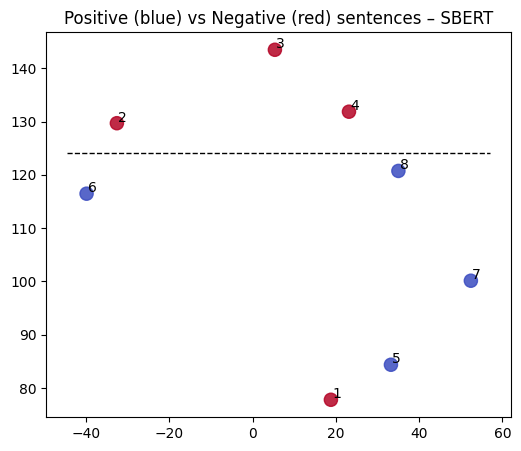

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,5))

plt.scatter(
    X2[:,0], X2[:,1],
    c=labels,
    cmap="coolwarm",
    s=90,
    alpha=0.85
)

# ---- write ID on each point ----
for i, sid in enumerate(ids):
    plt.text(
        X2[i,0] + 0.3,
        X2[i,1] + 0.3,
        str(sid),
        fontsize=10
    )

plt.title("Positive (blue) vs Negative (red) sentences – SBERT")

# ---- imaginary separating line ----
x_min, x_max = plt.xlim()
y_mid = np.mean(X2[:,1])
plt.plot([x_min, x_max], [y_mid+11, y_mid+11], "k--", linewidth=1)

plt.show()

### Negation failure demo on glove in real-life data
- Averaging word embeddings cannot model negation.

In [ ]:
s1 = "this movie is good"
s2 = "this movie is not good"

v1 = sent_emb_glove(s1, glove)
v2 = sent_emb_glove(s2, glove)

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([v1],[v2])[0][0]


np.float32(0.9915923)

In [ ]:
s1 = "this movie is good"
s2 = "this movie is not good"

v1 = model.encode(s1)
v2 = model.encode(s2)

cosine_similarity([v1], [v2])[0][0]

np.float32(0.76985806)

## Reference


*   [Medium Vlog](https://https://medium.com/@manansuri/a-dummys-guide-to-word2vec-456444f3c673)
*   [Gensim Vlog](https://https://www.geeksforgeeks.org/nlp/word2vec-with-gensim/)

*   [NLP prerequisite](https://https://www.analyticsvidhya.com/blog/2021/06/part-6-step-by-step-guide-to-master-nlp-word2vec/)
*   [Skip-gram](https://https://www.geeksforgeeks.org/python/implement-your-own-word2vecskip-gram-model-in-python/)
*   [CBOW](https://https://www.geeksforgeeks.org/nlp/continuous-bag-of-words-cbow-in-nlp/)



